In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.

### Instructions

- Apply the Random Forest algorithm to predict the `TARGET_B`. Please note that this column suffers from class imbalance. Fix the class imbalance using upsampling.



In [5]:
# We start loading the df

categorical_df=pd.read_csv("./files_for_lab/categorical.csv")
numerical_df= pd.read_csv("./files_for_lab/numerical.csv")
target_df= pd.read_csv("./files_for_lab/target.csv")

In [6]:
# We shortly display them to see the columns and shape of them
display(categorical_df)
display(numerical_df)
display(target_df)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [7]:
# We check the values of column TARGET D, as we want to have an idea of the avg donations to see the costs of predicting false values

target_df["TARGET_D"].describe()

count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64

In [8]:
# We concatenate the 3 df
concat_df = pd.concat([categorical_df, numerical_df, target_df], axis=1)

In [9]:
concat_df.head()
display(concat_df)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,L,E,C,T,2,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,CA,14,H,M,3,L,G,A,S,1,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,NC,43,U,M,3,L,E,C,R,2,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,CA,44,U,F,3,L,E,C,R,2,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,FL,16,H,F,3,L,F,A,S,2,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,25.0,25.0,9,25.000000,184568,0,1,12,0,0.0
95408,TX,24,H,M,3,L,F,A,C,1,...,20.0,20.0,9,20.000000,122706,1,1,2,0,0.0
95409,MI,30,H,M,3,L,E,B,C,3,...,10.0,10.0,3,8.285714,189641,1,3,34,0,0.0
95410,CA,24,H,F,2,L,F,A,C,1,...,21.0,18.0,4,12.146341,4693,1,4,11,1,18.0


In [10]:
# We check for NaN values. Seems as there were none.
concat_df.isna().sum()

STATE       0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
           ..
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
TARGET_B    0
TARGET_D    0
Length: 339, dtype: int64

In [11]:
# We check the class distribution on column "TARGET_B", as we will have to deal with imbalance:
display(concat_df['TARGET_B'].value_counts())
count_classes=concat_df['TARGET_B'].value_counts()


TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [12]:
# We check the ration of class imbalance between 0 and 1:

print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.90


In [13]:

# We proceed with the train and test split, split the categoricals to process the OneHotEncoding and pass the arrays into df:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

y = concat_df['TARGET_B']
X = concat_df.drop(['TARGET_B'], axis = 1)

X_cat  = X.select_dtypes(include='object')

# We create a list in which every element is another list with the unique values of each categorical column,
# because the OneHotEncoder will need to know all the acceptable values.
levels = [ list(X[col].unique()) for col in X_cat.columns ]

# Note: we need to do train/test split before downsampling, and then only downsample the training set - Why?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_num = X_train.select_dtypes(np.number)
X_test_num  = X_test.select_dtypes(np.number)

X_train_cat = X_train.select_dtypes(include='object')
X_test_cat  = X_test.select_dtypes(include='object')

# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later (in the lab).
# even though it is not needed for a DecisionTree or RandomForest model
encoder = OneHotEncoder(drop='first', categories=levels).fit(X_train_cat)

X_train_cat_encoded_np = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded_np  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_np,  columns=encoder.get_feature_names_out(), index=X_test.index)

X_train = pd.concat([X_train_num, X_train_cat_encoded_df], axis = 1)
X_test  = pd.concat([X_test_num, X_test_cat_encoded_df], axis = 1)


In [14]:
# We us the RandomOverSampler to reduce the class imbalance:

from imblearn.over_sampling  import RandomOverSampler

rus = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape

((144972, 355), (144972,))

In [15]:
# We check the ratio between 0 and 1
y_train_resampled

0         0
1         0
2         1
3         0
4         0
         ..
144967    1
144968    1
144969    1
144970    1
144971    1
Name: TARGET_B, Length: 144972, dtype: int64

In [16]:
X_train_resampled

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_G,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C
0,24,3,1,86,1,23,1,89,2,90,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,53,2,3,96,1,45,1,96,2,96,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,3,3,88,1,37,9,91,10,95,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,3,2,89,1,21,1,88,11,93,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,3,2,94,1,43,1,94,1,95,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144967,9,3,3,86,1,53,1,88,7,92,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144968,21,3,3,92,1,0,2,94,11,94,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
144969,9,1,3,92,1,29,1,93,12,93,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144970,40,3,2,95,1,66,1,94,11,96,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


The Accuracy for the Random Forest in the TRAIN set is 1.00
The Accuracy for the Random Forest in the TEST  set is 1.00


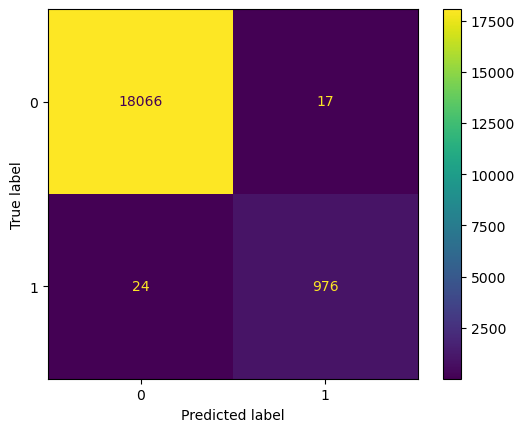

In [17]:
# We apply the RandomForestClassifier modelling to our resampled dfs:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

clf.fit(X_train_resampled, y_train_resampled)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_resampled, y_train_resampled)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_test_pred = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

- Discuss the model predictions and it's impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How much the money the company will not earn because of missclassifications made by the model?

In [18]:
# Out of the graphic above, we have False Negatives means that we will not predict a donor when the individual is likely to donate.
# For the company the monetary costs of missing out on potential donations are higher, as they could lead to a direct loss of revenue.
# False positive would on the other hand lead to maybe addressing campaigns or disturbing potential customer, who won´t donate.
# The monetary cost of the false positives is more difficult to measure.

# I would proceed as follows, calculating the donation average from the table target["TARGET_D"] and multiplying it to the amount of false negatives:

false_neg = 17
avg_donation = np.mean(target_df["TARGET_D"])
fn_total_cost= false_neg * avg_donation
print(f"The total cost of false negatives is: {round(fn_total_cost, 2)}")

The total cost of false negatives is: 13.48


- Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Which one?  Please checkout
[make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer) alongside with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in order to train the model to maximize the error metric of interest in this case.

In [19]:
# For cross validation
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

cross_val_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=10)

print("The mean accuracy of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean accuracy of the folds was 0.99


In [20]:
# We pass different options to try to find our best parameters and therefore our best model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150], # 3 * 2 * 2 * 2 * 1 = 3 * 8 = 24
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf' : [2, 4, 6],
    'max_depth': [3,5,7],
    'max_features': ['sqrt'] # round(sqrt(#cols))
    }

gb = RandomForestClassifier(random_state=100)

grid_search = GridSearchCV(gb, param_grid, cv=5,return_train_score=True,n_jobs=1, verbose = 20)
grid_search.fit(X_train_resampled,y_train_resampled)
best_params = grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 1/5; 1/81] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.829, test=0.826) total time=   6.3s
[CV 2/5; 1/81] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/5; 1/81] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.769, test=0.764) total time=   6.3s
[CV 3/5; 1/81] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/5; 1/81] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.794, test=0.791) total time=   5.8s
[CV 4/5; 1/81] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 4/5; 1/81] 

[CV 1/5; 7/81] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.829, test=0.826) total time=   6.2s
[CV 2/5; 7/81] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50
[CV 2/5; 7/81] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.769, test=0.764) total time=   6.0s
[CV 3/5; 7/81] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50
[CV 3/5; 7/81] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.794, test=0.791) total time=   6.1s
[CV 4/5; 7/81] START max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50
[CV 4/5; 7/81] END max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.844, test=0.846) total time=   5.9s
[CV 5/5; 7/81] START max_d

[CV 1/5; 13/81] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.829, test=0.826) total time=   5.9s
[CV 2/5; 13/81] START max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 13/81] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.769, test=0.764) total time=   5.9s
[CV 3/5; 13/81] START max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 13/81] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.794, test=0.791) total time=   5.5s
[CV 4/5; 13/81] START max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 13/81] END max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.844, test=0.846) total time=   6.1s
[CV 5/5; 13/81] STA

[CV 1/5; 19/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.829, test=0.826) total time=   6.6s
[CV 2/5; 19/81] START max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 2/5; 19/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.769, test=0.764) total time=   6.8s
[CV 3/5; 19/81] START max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 3/5; 19/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.794, test=0.791) total time=   6.7s
[CV 4/5; 19/81] START max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 4/5; 19/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.844, test=0.846) total time=   6.6s
[CV 5/5; 19/81] STA

[CV 1/5; 25/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.829, test=0.826) total time=  10.4s
[CV 2/5; 25/81] START max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50
[CV 2/5; 25/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.769, test=0.764) total time=  11.6s
[CV 3/5; 25/81] START max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50
[CV 3/5; 25/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.794, test=0.791) total time=   9.2s
[CV 4/5; 25/81] START max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50
[CV 4/5; 25/81] END max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.844, test=0.846) total time=  10.2s
[CV 5/5; 25/81] STA

[CV 1/5; 31/81] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.961, test=0.959) total time=  10.9s
[CV 2/5; 31/81] START max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 31/81] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.969, test=0.965) total time=   9.6s
[CV 3/5; 31/81] START max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 31/81] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.951, test=0.948) total time=   9.3s
[CV 4/5; 31/81] START max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 31/81] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.958, test=0.957) total time=   9.1s
[CV 5/5; 31/81] STA

[CV 1/5; 37/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=(train=0.961, test=0.959) total time=  10.9s
[CV 2/5; 37/81] START max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50
[CV 2/5; 37/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=(train=0.969, test=0.965) total time=  10.4s
[CV 3/5; 37/81] START max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50
[CV 3/5; 37/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=(train=0.954, test=0.952) total time=   9.0s
[CV 4/5; 37/81] START max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50
[CV 4/5; 37/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=50;, score=(train=0.958, test=0.957) total time=   9.1s
[CV 5/5; 37/81] STA

[CV 1/5; 43/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=50;, score=(train=0.961, test=0.959) total time=   9.1s
[CV 2/5; 43/81] START max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=50
[CV 2/5; 43/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=50;, score=(train=0.969, test=0.965) total time=   9.0s
[CV 3/5; 43/81] START max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=50
[CV 3/5; 43/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=50;, score=(train=0.954, test=0.952) total time=  10.3s
[CV 4/5; 43/81] START max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=50
[CV 4/5; 43/81] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=50;, score=(train=0.958, test=0.957) total time=  11.2s
[CV 5/5; 43/81] STA

[CV 1/5; 49/81] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=(train=0.961, test=0.959) total time=   8.9s
[CV 2/5; 49/81] START max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=50
[CV 2/5; 49/81] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=(train=0.968, test=0.965) total time=   9.0s
[CV 3/5; 49/81] START max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=50
[CV 3/5; 49/81] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=(train=0.954, test=0.952) total time=   8.8s
[CV 4/5; 49/81] START max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=50
[CV 4/5; 49/81] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=50;, score=(train=0.959, test=0.958) total time=   8.7s
[CV 5/5; 49/81] STA

[CV 1/5; 55/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.994, test=0.995) total time=  14.2s
[CV 2/5; 55/81] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 2/5; 55/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.999, test=0.999) total time=  13.5s
[CV 3/5; 55/81] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 3/5; 55/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.991, test=0.991) total time=  13.7s
[CV 4/5; 55/81] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 4/5; 55/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=(train=0.998, test=0.998) total time=  14.5s
[CV 5/5; 55/81] STA

[CV 1/5; 61/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.995, test=0.996) total time=  23.4s
[CV 2/5; 61/81] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50
[CV 2/5; 61/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.999, test=0.999) total time=  18.2s
[CV 3/5; 61/81] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50
[CV 3/5; 61/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.993, test=0.993) total time=  18.4s
[CV 4/5; 61/81] START max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50
[CV 4/5; 61/81] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=50;, score=(train=0.998, test=0.998) total time=  19.9s
[CV 5/5; 61/81] STA

[CV 1/5; 67/81] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.995, test=0.996) total time=  21.9s
[CV 2/5; 67/81] START max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 67/81] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.999, test=0.999) total time=  23.6s
[CV 3/5; 67/81] START max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 67/81] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.993, test=0.993) total time=  23.5s
[CV 4/5; 67/81] START max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 67/81] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=(train=0.997, test=0.997) total time=  27.1s
[CV 5/5; 67/81] STA

[CV 1/5; 73/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.995, test=0.995) total time=  15.5s
[CV 2/5; 73/81] START max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 2/5; 73/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.999, test=0.999) total time=  14.6s
[CV 3/5; 73/81] START max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 3/5; 73/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.992, test=0.991) total time=  14.5s
[CV 4/5; 73/81] START max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50
[CV 4/5; 73/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=50;, score=(train=0.996, test=0.996) total time=  11.8s
[CV 5/5; 73/81] STA

[CV 1/5; 79/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.995, test=0.995) total time=  12.4s
[CV 2/5; 79/81] START max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50
[CV 2/5; 79/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.999, test=0.999) total time=  11.3s
[CV 3/5; 79/81] START max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50
[CV 3/5; 79/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.992, test=0.991) total time=  11.7s
[CV 4/5; 79/81] START max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50
[CV 4/5; 79/81] END max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=50;, score=(train=0.996, test=0.996) total time=  11.5s
[CV 5/5; 79/81] STA

In [23]:
# Turns out to be that the best params are: 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 150

grid_search.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 150}

In [24]:
best_model = grid_search.best_estimator_

In [25]:
best_model

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=150, random_state=100)

In [26]:
# we predict the results applying the best_model to our y_test

y_pred = best_model.predict(X_test)

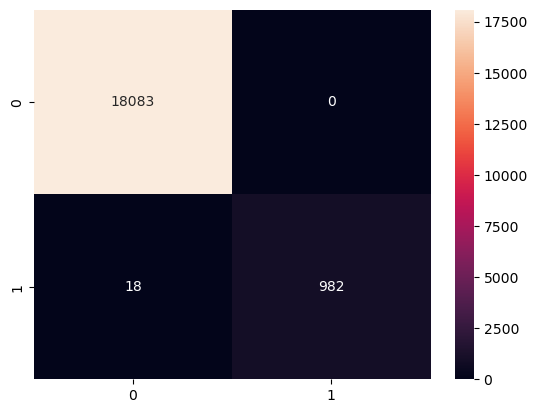

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
disp = ConfusionMatrixDisplay(cm_test, display_labels=best_model.classes_);
plt.show()

In [34]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18083
           1       1.00      0.98      0.99      1000

    accuracy                           1.00     19083
   macro avg       1.00      0.99      1.00     19083
weighted avg       1.00      1.00      1.00     19083



In [ ]:
# Our new model seems to have elimitated the false positives and also reduced the false negatives by 6 records, meaning that the new model is more performing than the previous one.